**I. Introduction**

**II. Importing Necessary Libraries**

**III. Acquiring Data**

**1. Explanatory Data Analysis (EDA) - Training Dataset**
- 1.1 Unlocked `train_df` Dataset Description
- 1.2 Checking Null / Missing Values for Each of The Columns
- 1.3 Heatmap
- 1.4 Correlation Between 'Survived' Feature and Other Numerical Features
- 1.5 Heat Map Highlighting Missing Value

**2. Visual Representation**
- 2.1 Survivor vs Death Number
- 2.2 Survival Based on Passenger Class (Pclass)
- 2.3 Survival Based on Gender
- 2.4 Survival Based on Embarked Harbour
  - 2.4.1 Passenger Class Based on Embarked          Harbour
- 2.5 Survivor Based on Pclass and Sex
- 2.6 Survivor Based on Pclass and Embarked Port
- 2.7 Survival Based on Fare
- 2.8 Correlation Between  Survival Rate, Embarked Harbour, and Gender

**3. Visual Representation by Crosstab Analytics**
- 3.1 Survival Based on Sex / Gender
- 3.2 Survival Based on Passenger Class
- 3.3 Survival Based on Embarked Harbour
- 3.4 Survival Based on Count of Sibling or Spouse
- 3.5 Survival Based on Count of Parent and Children

**4. Visual Representation of Features**
- 4.1 Visual Representation of Age
   - 4.1.1 Visual Representation of Age Based on Sex
   - 4.1.2 Visual Representation of Age Based on Pclass
   - 4.1.3. Visual Representation of Age Based on Embarked Port

- 4.2 Visualization of Parent and Children (Parch)
   - 4.2.1 Visualization of 'Parch' Based on Embarked Port

- 4.3 Visualization of Siblings / Spouses
   - 4.3.1 Visualization of 'SibSp' Based on Embarked Harbour

**5. Data Preprocessing**
- 5.1 Handling Missing Data of Age
- 5.2 Handling Missing Data of Cabin
- 5.3 Handling Missing Data of Embarked Harbour

**6. Encoding Categorical Features**

**7. Train and Test Split for `train_df`**

**8. Feature Scaling**

**9. Logistic Regression Model**
- 9.1 Predicting Survivor of the X_test

**10. Model Evaluation**
- 10.1 Evaluating Model with Confusion Matrix
   - 10.1.1 Statistical Representation of Confusion Matrix
   - 10.1.2 Visual Representation of Confusion Matrix

- 10.2 Accuracy, Precision, and Recall
- 10.3 Classification Report

**11. Setting New Threshold**
- 11.1 Checking Confusion Matrix for The Updated Threshold
- 11.2 Accuracy, Precision, and Recall
- 11.3 Classification Report for Updated Threshold

**12. Testing Dataset (Test.csv) Analysis**
- 12.1 Missing Value Analysis of Test.csv

**13. Data Preprocessing for Test.csv**
- 13.1 Handling Missing Data of 'Age'
- 13.2 Handling Missing Data of 'Cabin'
- 13.3 Handling Missing Data of 'Fare'

**14. Dropping Insignificant Features**

**15. Encoding Categorical Features of `test_df`**

**16. Feature Scaling for `test_df`**

**17. Building Logistic Regression**

**18. Conclusion**

# I. Introduction

**Early Overview of Titanic Tragedy**

* On April 15, 1912, Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. It is around 32% survival rate.

* Some groups of people were more likely to survive than others, such as women, children, and the upper-class.

A Logistic Regression Machine Learning algorithm is designed to forecast the answers to the question "Which types of individuals were more likely to survive?" by analyzing passenger data, including details such as names, ages, genders, and socio-economic classes.

Logistic regression is a statistical technique used to forecast variables that fall into distinct categories. It is the most frequently employed machine learning algorithm for binary classification tasks. For this specific dataset, we need to develop a model that accurately predicts whether a passenger survived or not, with the outcome categorized into two distinct classes. This approach is particularly suitable when the task involves predicting two discrete classes like "Yes/No" or "True/False." The algorithm calculates the probability of an event occurring using the logistic function, also known as the sigmoid function, and maps its outcome into two classes: 0 or 1. The sigmoid function is an ‘S’ shaped curve and it takes any value as input but will have values as output, around 0 - 1. 

The output of the sigmoid function is mapped to 1 or 0 based on threshold value 0.5. Further explanation as follows:

1. If value of Probability of occurence of the event > 0.5, sigmoid function output will be 1
2. If value of Probability of occurence of the event < 0.5, sigmoid function output will be 0

# II. Importing Necessary Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [16]:
# Visualisation Package
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library for Feature Scaling
from sklearn.preprocessing import RobustScaler

# Libraries for Building logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Library for Model Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# III. Acquiring Data
The Titanic datasets consists of two separate CSV files, one for training data and another for test data. The training data is imported into a variable named `train_df`, while the test data is imported into a variable named `test_df`. 

The idea is to split the training dataset (`train_df`) into two categories: a training dataset and a testing dataset. We will then use the logistic regression model we build to predict and evaluate the testing dataset. After that, we will test the `test_df` dataset using that logistic regression model. 

For now on, we will refer to these two datasets as follows:

In [2]:
train_df = pd.read_csv('../input/titanic/train.csv')
test_df = pd.read_csv('../input/titanic/test.csv')

In [3]:
#See all the columns name
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<div class="alert alert-block alert-info"> The Titanic datasets contains the following columns of information:

1. Passenger ID: A unique identifier for each passenger.
2. Survival Status: Indicates whether the passenger survived or not. This feature is unavailable in `test_df`
3. Passenger Class: The social class of the passenger.
4. Name: The full name of each passenger, also with their title
5. Sex: The gender of each passenger.
6. Age: The age of each passenger.
7. SibSP (Siblings/Spouse): The number of siblings and spouse accompanying the passenger.
8. Parch (Parents/Children): The number of parents and children accompanying the passenger.
9. Ticket Number: A unique identifier for each passenger's ticket.
10. Fare: The cost of the passenger's ticket.
11. Cabin Number: The cabin number assigned to each passenger, with NaN indicating no cabin allocated.
12. Embarkation Port: The port from which the passenger boarded the Titanic. </div>

In [5]:
#To see the number or rows (training datasets)
print(train_df.shape[0])

#To see the number of columns
print(train_df.shape[1])

891
12


In [6]:
#To see the earliest 5 rows of the training dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#To see the number or rows (test datasets)
print(test_df.shape[0])

#To see the number of columns
print(test_df.shape[1])

418
11


In [8]:
#To see the earliest 5 rows of the test dataset
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


The `test_df` does not contain a 'Survived' column. Therefore I will split the `train_df` into training and testing dataset. Once this is done, I will use the `train_df` to predict this output.

# 1. Explanatory Data Analysis (EDA) - Training Dataset

**1.1 Unlocked `train_df` Dataset Description**

In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Distribution of the Categorical Features
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


**Description of the table above:**
1. The names in the dataset are unique, with no duplicates (count=unique=891).
2. The sex variable has two possible values, with 64,7% of the passengers being male.
3. The cabin values are not unique, as several passengers share the same cabin.
4. The ticket feature also not unique
5. The embarked variable has three possible values, with most passengers departed from S (Southampton) port.


**1.2 Checking Null / Missing Values for Each of The Columns**

In [11]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The columns with a value of 0 indicate that there are no Null / missing values. However, in this dataset, there are missing values present in the columns 'Age', 'Cabin', and 'Embarked'. The number of missing values for each column is:

1. 'Age': 177
2. 'Cabin': 687
3. 'Embarked': 2


**1.3 Heat Map**

Heat Map To check correlation between only **numerical** features

In [12]:
train_df_num_col = train_df.select_dtypes(exclude=['object']).columns
train_df_num = train_df[train_df_num_col]

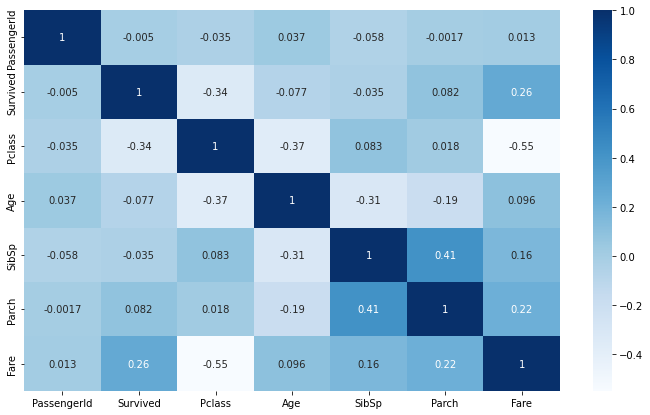

In [20]:
plt.figure(figsize=(12, 7))
sns.heatmap(train_df_num.corr(), annot=True, cmap='Blues');

From the heatmap above, we can conclude several insights:

1. A minus 0.34 correlation between the 'Survived' and 'Pclass' features indicates that passengers who could afford the highest passenger class (smaller number of Passenger Class category, as 1st passenger class is the most luxurious) are more likely to have survived ('Survived' is 1 and 'Not Survived' is 0, so 1 is a bigger number).
2. A minus 0.37 correlation between the 'Age' and 'Pclass' features suggests that passengers who tend to be young (more lower numbers) are more likely to have bought tickets from the 3rd class (bigger number of passenger class).
3. A minus 0.55 correlation between the 'Fare' and 'Pclass' features indicates that passengers who bought tickets with cheaper fares (more lower numbers) are more likely to have bought tickets from the 3rd class (bigger number of passenger class).
4. A 0.22 correlation between the 'Fare' and 'Parch' features suggests that passengers who bought tickets with cheaper fares (more lower numbers) are more likely to have traveled with fewer or no parents or children.
5. A 0.26 correlation between the 'Fare' and 'Survived' features indicates that passengers who bought tickets with cheaper fares (more lower numbers) are more likely not to have survived ('Survived' is 1 and 'Not Survived' is 0, so 0 is a smaller number).
6. A 0.41 correlation between the 'Parch' and 'SibSp' features suggests that passengers who traveled with fewer or no parents or children (more lower numbers) are more likely to have traveled with fewer or no siblings and spouses.


**1.4 Correlation Between 'Survived' Feature and Other Numerical Features**

In [21]:
#To see the correlation between the 'Survived' feature and the other numerical features
correlation = abs(pd.DataFrame(train_df.corr().Survived))
correlation

,Survived
PassengerId,0.005007
Survived,1.000000
Pclass,0.338481
Age,0.077221
SibSp,0.035322
Parch,0.081629
Fare,0.257307


Based on the correlation table above, it shows that the probability of survival for a passenger is highly correlated with the ticket they purchased. The more expensive the ticket they bought, the more likely they are to stay in the most luxurious passenger class. By staying in the most luxurious passenger class, their chance of survival increases.


**1.5 Heat Map Highlighting Missing Value**

<AxesSubplot:>

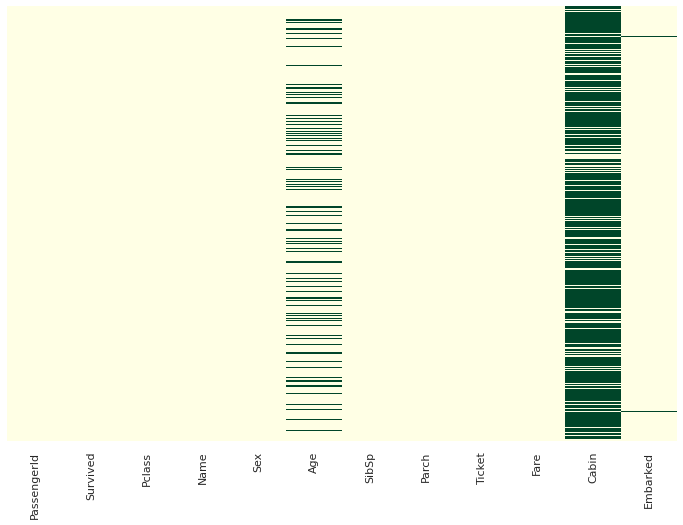

In [24]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap="YlGn")

Using seaborn package, we can generate a heat map that highlights missing values in the dataset. In this heat map, dark blue lines represent missing values or True values. The visualization clearly shows that a small proportion of rows have missing Cabin values, and Age is also significantly missing. Additionally, there are two lines for Embarked, indicating that there are two missing values in this column.

# 2. Visual Representation 


**2.1 Survivor vs Death Number**

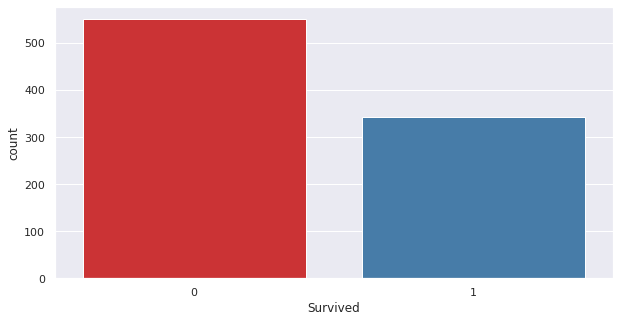

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(x = "Survived",data=train_df, palette="Set1")
plt.show()

The visual plot of the training set clearly indicates that the number of people who survived is significantly lower than the number of people who die.


**2.2 Survival Based on Passenger Class (Pclass)**

<Figure size 720x216 with 0 Axes>

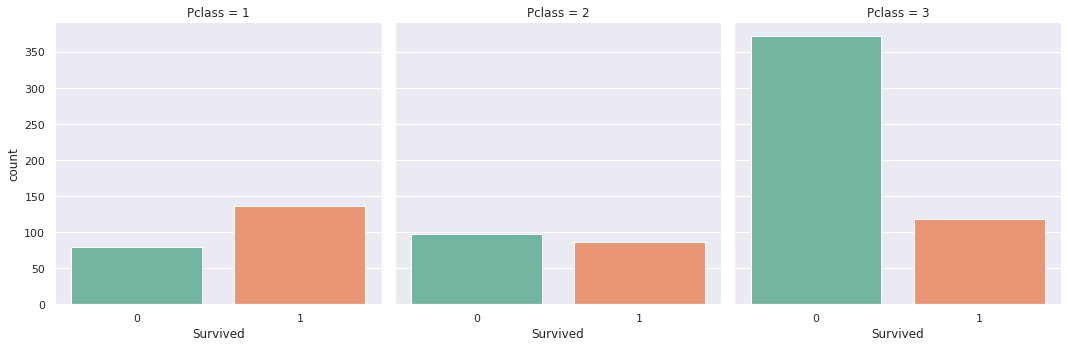

In [29]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', col='Pclass', kind='count', data=train_df,palette="Set2");
plt.show()

In [32]:
#Probability of Survival Based on Pclass
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


The above graphic and table clearly indicates that the majority of passengers who did not survive belong to either Passenger Class 3 or the cheapest ticket class, suggesting a **strong correlation between socioeconomic status and survival rates** on the Titanic.


**2.3 Survival Based on Gender**

<Figure size 720x216 with 0 Axes>

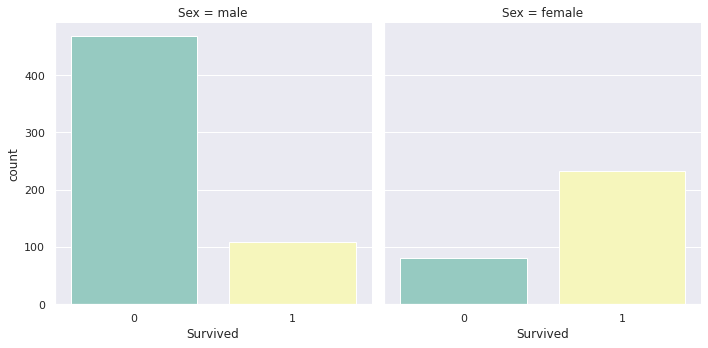

In [33]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Survived', col='Sex', kind='count', data=train_df,palette="Set3");
plt.show()

In [34]:
#Probability of Survival Based on Sex / Gender
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


The above graphic and table clearly indicates that the majority of gender who did not survive are more likely to be male, **suggesting a strong correlation between gender and survival rates** on the Titanic.


**2.4 Survival Based on Embarked Harbour**

<Figure size 720x360 with 0 Axes>

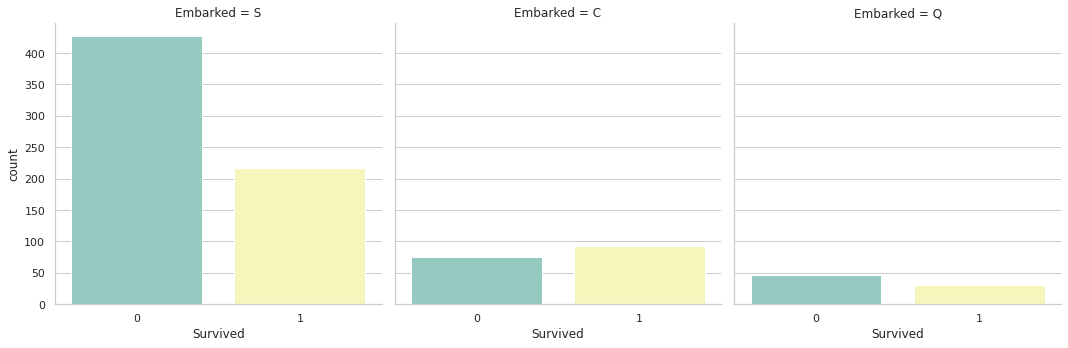

In [35]:
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Embarked', kind='count', data=train_df,palette="Set3");
plt.show()

The majority of **people who boarded from Southampton port could not survive**, and we have already observed that people in 3rd Class were less likely to survive. To investigate the relationship between Pclass and Embarked, we can use the Titanic dataset to analyze the correlation between these variables.


**2.4.1 Passenger Class Based on Embarked Harbour**

<Figure size 720x216 with 0 Axes>

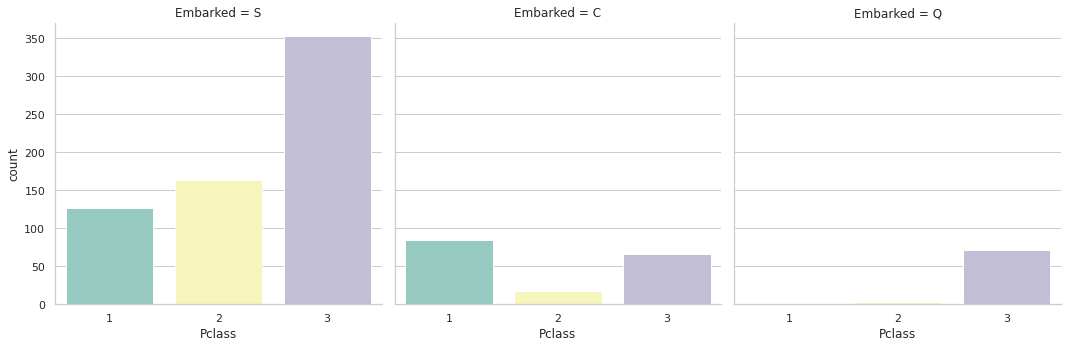

In [37]:
plt.figure(figsize=(10, 3))
sns.catplot(x='Pclass', col='Embarked', kind='count', data=train_df,palette="Set3");
plt.show()

It is clearly indicated that the **people who boarded from Southampton Port are predominantly from 3rd passenger class**. Therefore, it is not surprising that the majority of people who boarded from Southampton port could not survive, given the strong correlation between socioeconomic status and survival rates on the Titanic, which we previously observed in Section 5.2.


**2.5 Survivor based on Pclass and Sex**

<Figure size 720x216 with 0 Axes>

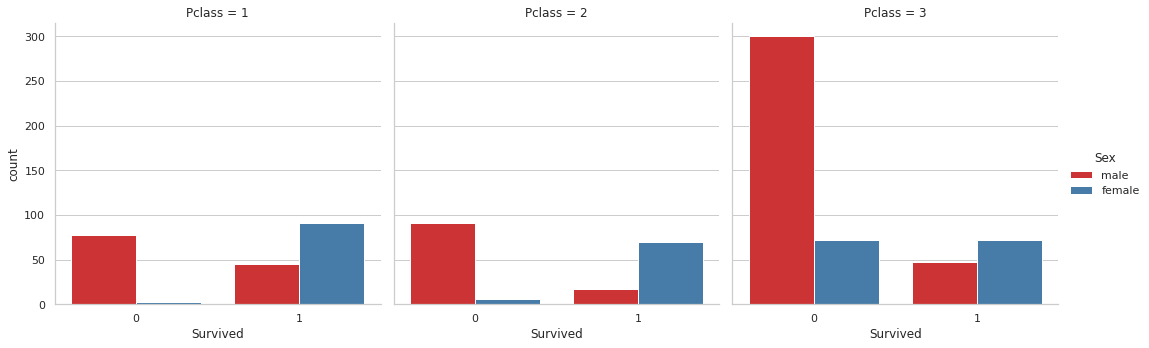

In [38]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Survived', col='Pclass', hue = 'Sex', kind='count', data=train_df,palette="Set1");
plt.show()

The above graphic provides a more detailed view of the passengers who did not survive. It reveals that:
1. The majority of males in Passenger Class 3, as well as half of the females in Passenger Class 3, were unable to survive
2. Passenger Classes 2 and 1, almost all of those who did not survive were male.


**2.6 Survivor Based on Pclass and Embarked Port**

<Figure size 720x216 with 0 Axes>

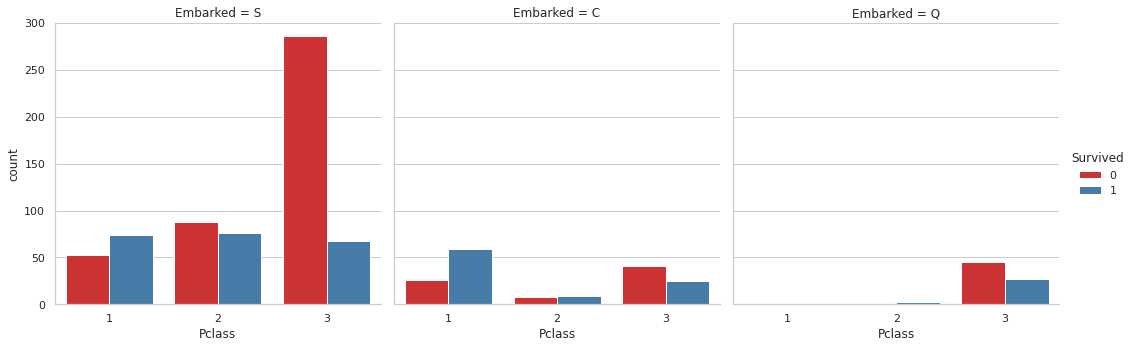

In [44]:
plt.figure(figsize=(10, 3))
sns.set_style('whitegrid')
sns.catplot(x='Pclass', col='Embarked', hue = 'Survived', kind='count', data=train_df,palette="Set1");
plt.show()

From the table above, we can conclude the following insights:

1. The survival rate of 1st class passengers is higher than their death rate.
2. The survival rate of 2nd class passengers who embarked from Cherbourg Harbour is higher than their death rate.
3. The survival rate of 3rd class passengers is lower than their death rate.



**2.7 Survival based on Fare**

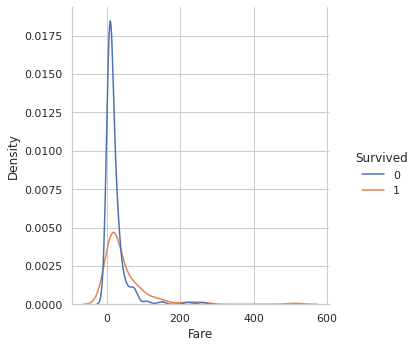

In [39]:
sns.displot(data=train_df, x="Fare",hue='Survived',kind ='kde')

The majority of passengers who tragically did not survive the Titanic disaster were those who had purchased tickets at the lowest fares, indicating a significant correlation between economic status and survival rates on the ill-fated voyage.


**2.8 Correlation Between Survival Rate, Embarked Harbour, and Gender**

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


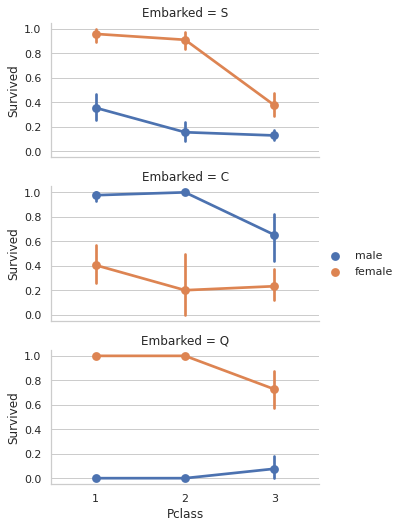

In [40]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.5, aspect=1.9)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

The plot above suggests that: 
1. Female passengers had a significantly higher survival rate compared to male passengers, which supports 5.3 section. 
2. There is an exception in the Embarked=C category where males had a higher survival rate. 

# 3. Visual Representation by Crosstab Analytics

**3.1 Survival Based on Sex / Gender**

In [48]:
pd.crosstab(train_df.Sex,train_df.Survived,normalize = "index" ).style.background_gradient(cmap='crest')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


Among the total number of female passengers, a remarkable 74.2% were able to survive the Titanic disaster, whereas among the total number of male passengers, a significantly lower 18.9% were able to survive.

**3.2 Survival Based on Passenger Class**

In [49]:
pd.crosstab(train_df.Pclass,train_df.Survived,normalize = "index" ).style.background_gradient(cmap='Spectral_r')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


The statistical analysis of survival rates based on Passenger Class reveals that 62.96% of passengers from First Class (Pclass 1) survived, while 47.28% of passengers from Second Class (Pclass 2) survived, and only 24.24% of passengers from Third Class (Pclass 3) survived.

**3.3 Survival bBased on Embarked Harbour**

In [50]:
pd.crosstab(train_df.Embarked,train_df.Survived,normalize = "index" ).style.background_gradient(cmap='Pastel2')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.663043,0.336957


The statistical analysis of survival rates based on the port of embarkation reveals that 55.36% of passengers who embarked from Cherbourg (C) survived, while 38.96% of passengers who embarked from Queenstown (Q) survived, and 33.7% of passengers who embarked from Southampton (S) survived.

**3.4 Survival Based on Count of Sibling or Spouse**

In [51]:
pd.crosstab(train_df.SibSp,train_df.Survived,normalize = "index" ).style.background_gradient(cmap='Pastel2')

Survived,0,1
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667
5,1.000000,0.000000
8,1.000000,0.000000


The statistical analysis reveals that passengers who traveled alone have a significantly higher probability of not surviving. However, most Titanic passengers did travel alone based on the EDA in section 4.3. On the other hand, passengers who traveled with 1 or 2 siblings or spouses have a higher probability of survival compared to those who traveled with fewer or no family members. Notably, passengers who traveled with 4 siblings or spouses have the highest probability of not surviving.

**3.5 Survival Based on Count of Parent and Children**

In [62]:
pd.crosstab(train_df.Parch,train_df.Survived,normalize = "index" ).style.background_gradient(cmap='Pastel1')

Survived,0,1
Parch,,
0,0.656342,0.343658
1,0.449153,0.550847
2,0.500000,0.500000
3,0.400000,0.600000
4,1.000000,0.000000
5,0.800000,0.200000
6,1.000000,0.000000


The statistical analysis shows that passengers with a Parch value of 4, 6, 5, or 0 are most likely to have not survived.

# 4. Visual Representation of features 

**4.1 Visual Representation of Age**

<AxesSubplot:xlabel='Age', ylabel='Count'>

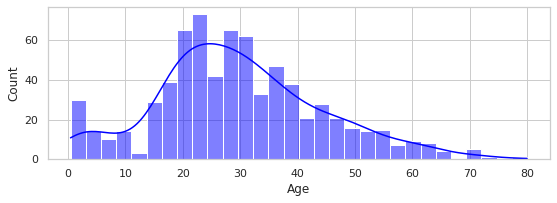

In [52]:
plt.figure(figsize=(9, 2.8))
sns.histplot(train_df['Age'].dropna(),kde=True,color='blue',bins=30)

<AxesSubplot:xlabel='Age', ylabel='Count'>

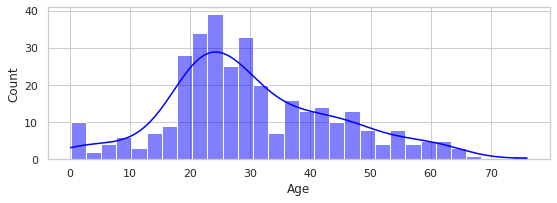

In [66]:
plt.figure(figsize=(9, 2.8))
sns.histplot(test_df['Age'].dropna(),kde=True,color='blue',bins=30)

The age distribution visualization provides a clear indication that the majority of passengers on the Titanic were relatively young. This skew towards younger passengers is evident from the visual representation of the age distribution. If we wish to delve deeper into the age distribution and examine specific age groups, we can utilize the cufflinks library / package to further analyze and visualize the data.

**4.1.1 Visual Representation of Age Based on Sex**

<AxesSubplot:xlabel='Age', ylabel='Count'>

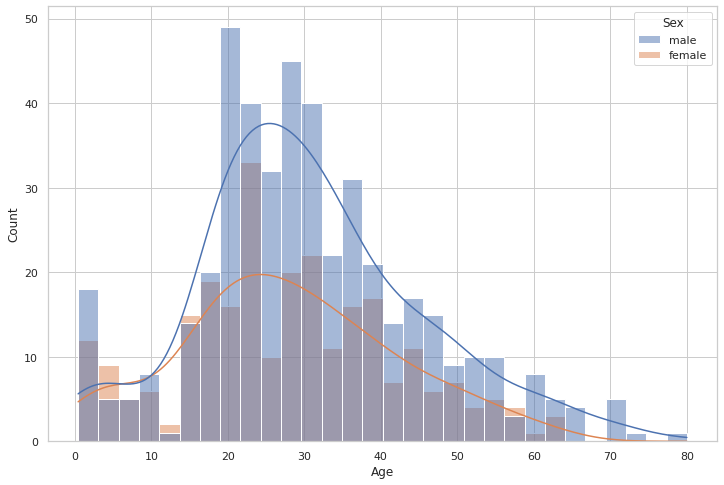

In [53]:
sns.histplot(data=train_df, x='Age', hue='Sex', kde=True, color='blue', bins=30)

<AxesSubplot:xlabel='Age', ylabel='Count'>

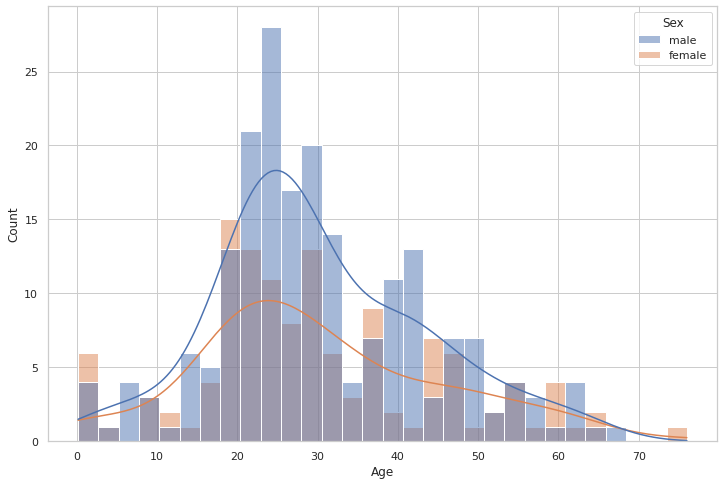

In [64]:
sns.histplot(data=test_df, x='Age', hue='Sex', kde=True, color='blue', bins=30)

Clearly, there were more male passengers than female passengers.

**4.1.2 Visual Representation of Age Based on Pclass**

<AxesSubplot:xlabel='Age', ylabel='Count'>

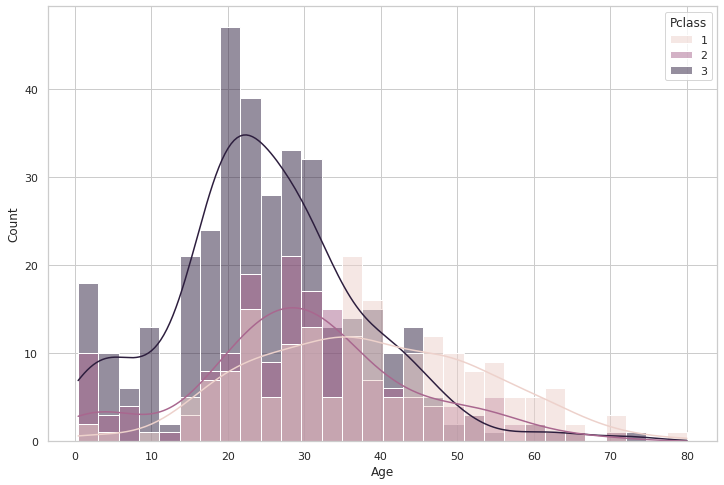

In [54]:
sns.histplot(data=train_df, x='Age', hue='Pclass', kde=True, color='blue', bins=30)

<AxesSubplot:xlabel='Age', ylabel='Count'>

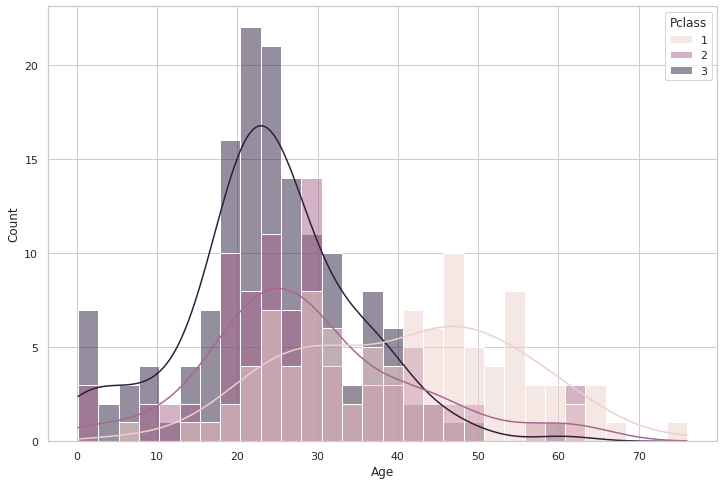

In [65]:
sns.histplot(data=test_df, x='Age', hue='Pclass', kde=True, color='blue', bins=30)

The analysis reveals that younger passengers (aged 40 or less) were more likely to be in 3rd class, while older passengers were more likely to be in 1st or 2nd class.


**4.1.3 Visual Representation of Age Based on Embarked Port**

<AxesSubplot:xlabel='Age', ylabel='Count'>

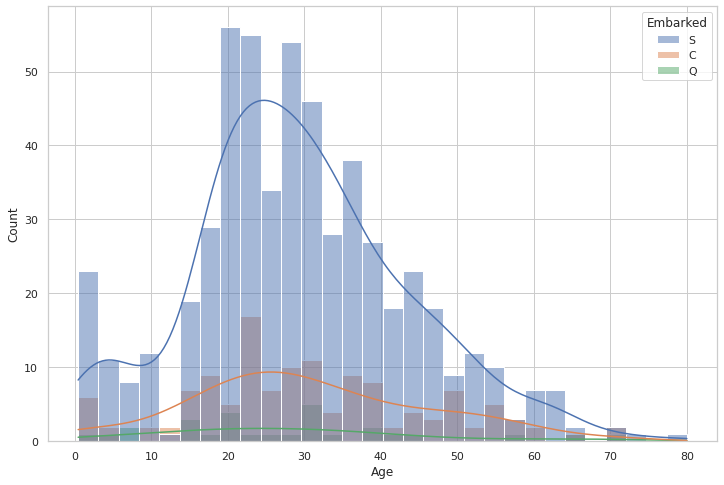

In [55]:
sns.histplot(data=train_df, x='Age', hue='Embarked', kde=True, color='blue', bins=30)


**4.2 Visualization of Parent and Children (Parch)**

<AxesSubplot:xlabel='Parch', ylabel='Count'>

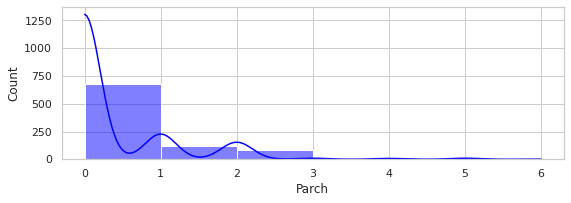

In [56]:
plt.figure(figsize=(9, 2.8))
sns.histplot(train_df['Parch'].dropna(),kde=True,color='blue',bins=6)

<AxesSubplot:xlabel='Parch', ylabel='count'>

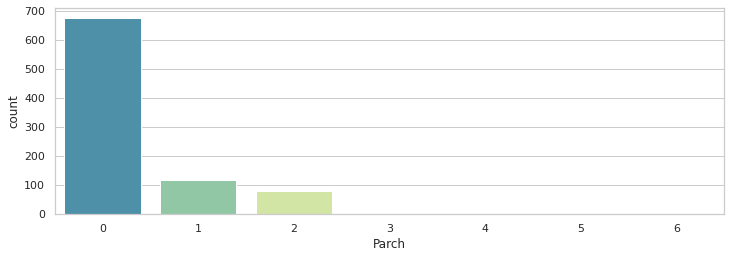

In [57]:
plt.figure(figsize=(12, 3.8))
sns.countplot(x='Parch',data=train_df, palette='Spectral_r')

The visualization provided above clearly indicates that the **majority of passengers who traveled on the Titanic did not have children accompanying them**. This is evident from the fact that the largest proportion of passengers is represented by those who did not have children, as shown by the dominant portion of the bar chart. T**his suggests that the majority of passengers were either traveling alone or with adults**, rather than with children. This information can be useful in understanding the demographics of the passengers and the social dynamics of the time period.

**4.2.1 Visualization of 'Parch' Based on Embarked Port**

<AxesSubplot:xlabel='Parch', ylabel='Count'>

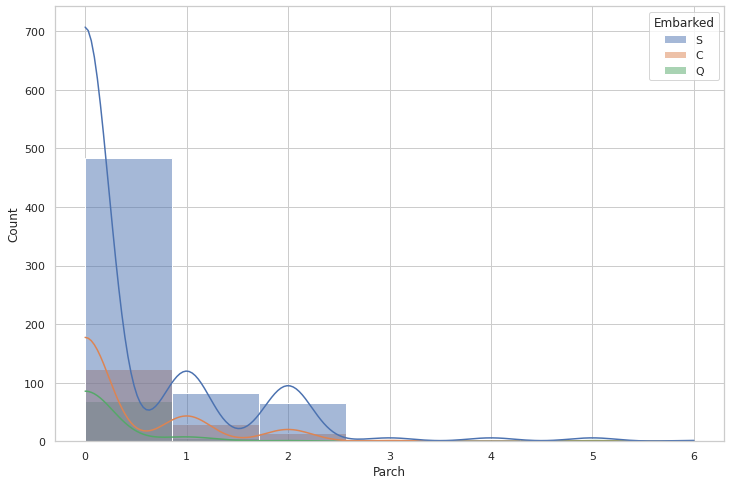

In [58]:
sns.histplot(data=train_df, x='Parch', hue='Embarked', kde=True, color='blue', bins=7)


**4.3 Visualisation of Siblings / Spouses**

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

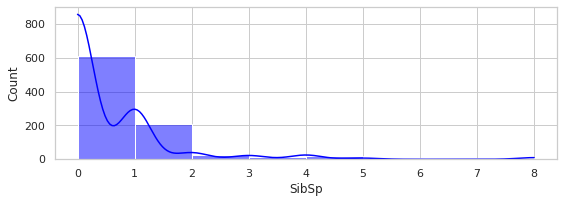

In [59]:
plt.figure(figsize=(9, 2.8))
sns.histplot(train_df['SibSp'].dropna(),kde=True,color='blue',bins=8)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

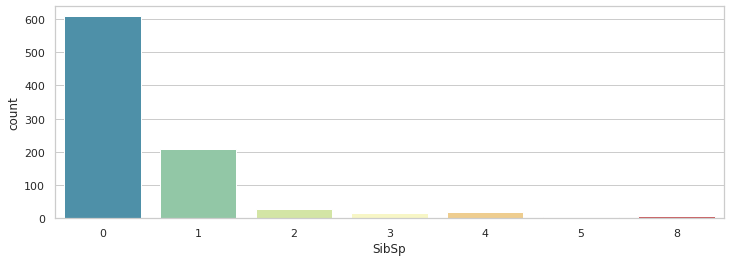

In [60]:
plt.figure(figsize=(12, 3.9))
sns.countplot(x='SibSp',data=train_df, palette='Spectral_r')

The visualization provided above clearly indicates that the majority of passengers who traveled on the Titanic did not have siblings or spouses accompanying them. This is evident from the fact that the largest proportion of passengers is represented by those who did not have siblings or spouses, as shown by the dominant portion of the bar chart. **This suggests that the majority of passengers were either traveling alone or with other relatives, such as parents or other family members, rather than with siblings, spouses, Children** (based on section 7.3). This information can be useful in understanding the demographics of the passengers and the social dynamics of the time period, particularly in terms of family structures and relationships.

**4.3.1 Visualisation of 'SibSp' Based on Embarked Harbour**

<AxesSubplot:xlabel='SibSp', ylabel='Count'>

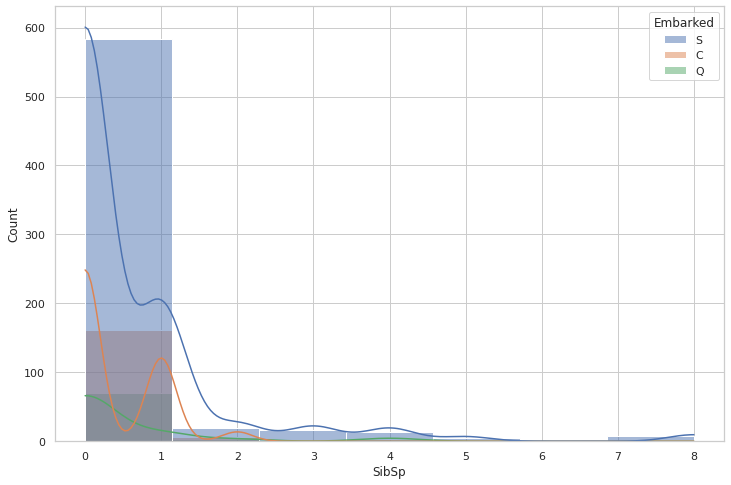

In [61]:
sns.histplot(data=train_df, x='SibSp', hue='Embarked', kde=True, color='blue', bins=7)


# 5. Data Preprocessing

There are 3 Missing Values in the data for three variables: Age, Cabin, and Embarked. These missing values can potentially impact the accuracy and reliability of our analysis. Specifically, we have identified the following number of missing data points for each of these variables:
* Age: 177
* Cabin: 687
* Embarked: 2

It is essential that we address these missing value in the data or develop strategies to handle the missing values effectively.


**5.1  Handling Missing Data of Age**

In [68]:
#First thing we need to do is to find out how many missing values are in the dataset
train_df['Age'].isnull().sum()

177

The Age column contains 177 null values, which can impact the reliability of our analysis. To address this issue, we can use an imputing function to fill in the missing age data. One approach is to identify the dependency of age on the Pclass variable, as we have observed that 3rd class passengers have a lower survival rate. 

To better understand this relationship, we can visualize the distribution of age over Pclass using a boxplot. This graphical representation provides insights into the central tendency, dispersion, and skewness of the data, allowing us to identify patterns and trends that can inform our approach to imputing missing age data and improve the accuracy of our results.

Text(0.5, 1.0, 'Age over Pclass')

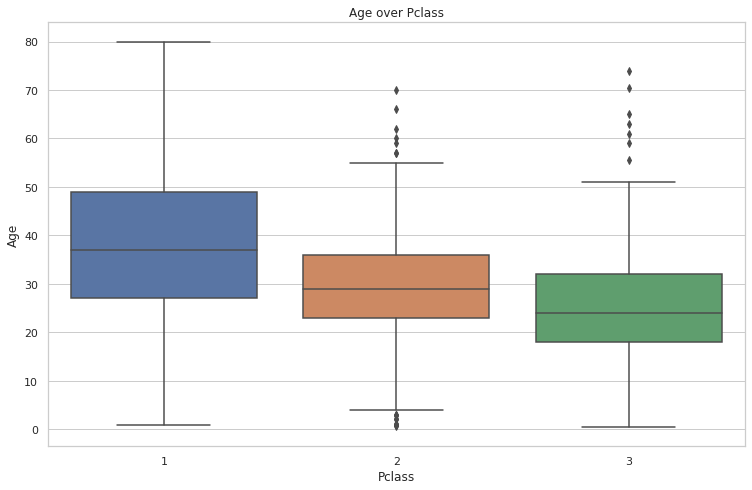

In [71]:
plt.figure(figsize=(12.5, 7.8))
sns.boxplot(x='Pclass',y='Age',data=train_df)
plt.title('Age over Pclass')

The boxplot reveals a clear pattern, indicating that older passengers are predominantly found in Pclass 1, with a gradual decrease in age as we move to Pclass 2 and Pclass 3. This observation suggests that **there is a strong correlation between age and Pclass**. To impute the missing age values, we can utilize the following code. Additionally, we can observe that the median age for each Pclass is as follows: 
- Pclass 1 is 37, 
- Pclass 2 is 29, and 
- Pclass 3 is 24.

To implement this imputation strategy, we can define an impute_train_age() function using an if-else structure. This function will return the age value, which will be set to the median age of the corresponding Pclass. This approach will allow us to fill in the missing age values based on the observed patterns in the data.

In [72]:
def impute_train_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

We have previously defined a function impute_train_age() that takes a tuple cols as input. When we call this function, it will return the age value based on the passenger class (Pclass) specified in the input. With this function in place, **we can now utilize it to replace the null values in the Age column** with the corresponding age values based on the passenger class as follow:

In [73]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_train_age,axis=1)

Now, if we execute the code that follows, it will effectively eliminate the null values in the dataset by treating them as zeros, thereby ensuring that the subsequent analysis and calculations are performed on a complete dataset without any missing values.

In [74]:
train_df['Age'].isnull().sum()

0

**5.2  Handling Missing Data of Cabin**

In [75]:
train_df['Cabin'].isnull().sum()

687

Out of the total 891 rows in the dataset, a significant 687 rows have null values in the Cabin column. Furthermore, the Cabin column contains categorical values represented as strings, such as C85, C123, and so on. 

Given the high proportion of null values and the categorical nature of the data, it is reasonable to consider dropping this column from the dataset to simplify the analysis and reduce the impact of missing data.

In [76]:
train_df.drop('Cabin',axis=1,inplace=True)

In [77]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Now the Cabin column is removed


**5.3  Handling Missing Data of Embarked Harbour**

In [78]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

The Embarked column is the only remaining variable in the dataset that still contains missing values. The Embarked column contains a very small number of missing values, specifically only two rows. Given the minimal impact of these missing values on the overall dataset, it is reasonable to consider dropping these two rows to ensure a complete and consistent dataset for analysis.

In [79]:
train_df.dropna(inplace=True)

In [80]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

The dataset has been thoroughly cleaned and processed, resulting in the complete elimination of all missing data, ensuring that the analysis can proceed with a fully populated and reliable dataset.

# 6.  Encoding Categorical Features

In [81]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


After examining the information provided by train_df.info(), we have identified that our dataset now consists of 4 categorical variables: 'Name', 'Sex', 'Ticket', and 'Embarked'. 

The features "Name" and "Ticket" are not expected to have a significant impact on the target variable, so they can be removed from the dataset. On the other hand, the features "Sex" and "Embarked" will require encoding before being used to build the model.

In [83]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [85]:
train_df.drop(['Name','Ticket'],axis=1,inplace=True)

In [86]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


'PassengerId' does have any significance in order to **building model** in the next section of this research, so it is better being dropped.

In [87]:
train_df.drop('PassengerId',axis=1,inplace=True)

Our dataset now consists of only two categorical variables: 'Sex' and 'Embarked'. To prepare these variables for model building, we need to encode them using dummy variables. This can be achieved by using the pandas.get_dummies() function, which will create dummy variables for each discrete categorical value in each column. 

For the 'Sex' column, we have two categories: male and female. For the 'Embarked' column, we have three harbour: Cherbourg, Queenstown, and Southampton. To avoid multicolinearity, we will create dummy variables for each city, but then drop one of them. This is because if a data point does not belong to Cherbourg or Queenstown, it must belong to Southampton. 

Similarly, if a data point is not male, it must be female. By dropping one dummy variable, we ensure that no relevant information is lost, as the remaining dummy variables can fully explain the dropped feature. The pandas.get_dummies() function can be used with the drop_first=True parameter to automatically drop the first dummy variable, resulting in n-1 dummy variables for n categorical levels.

In [88]:
train_df = pd.get_dummies(train_df, columns = ['Sex'], drop_first=True)
train_df = pd.get_dummies(train_df, columns = ['Embarked'], drop_first=True)

After encoding the categorical variables 'Sex' and 'Embarked' using dummy variables, the train_df.head() function will now display the dataset with the new columns replaced by the corresponding discrete values.

In [90]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


When encoding categorical variables, the resulting column names are created in alphabetical order and are appended to the end of the dataset's columns. This means that the **dropped column will be the first alphabetically ordered column of that category**. For instance, in the 'Embarked' column, the encoding leads to the creation of 'Embarked_Q' and 'Embarked_S', while 'Embarked_C' is dropped. As a result of this encoding process, all columns in the dataset now contain numerical data, **which is essential for further analysis and modeling**.

# 7. Train and Test Split for `training_df`

As previously discussed, the test.csv dataset does not contain survival data. Therefore, for the purpose of training and testing, we will utilize the train_df dataset, as it is the only dataset that contains the target variable (Survived or not). Once the evaluation process is complete, we can use the trained model to predict the target variable for the test_data.csv dataset, which will allow us to assess the model's performance on unseen data.

In [91]:
X = train_df.drop(['Survived'],axis = 1)
y = train_df['Survived']

In [92]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [93]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

In [95]:
X_train.shape

(711, 8)

In [96]:
X_test.shape

(178, 8)

In [97]:
y_train.shape

(711,)

In [98]:
y_test.shape

(178,)

# 8. Feature Scaling

Feature scaling is a **crucial step** in machine learning that ensures all features in a dataset are on the same scale, preventing any one feature from dominating the others. This process is typically performed after splitting the dataset into a training set and a test set, and it is applied only to the training set. 

1. **fit_transform()** method is used for the training set, which includes two steps: fit() calculates the mean and standard deviation of the data, and transform() applies these calculated values to the dataset, scaling it to fit the model. 

2. **transform()** method is then used for the test set, applying the same scaling to the test data using the model parameters learned from the training data. This ensures that the test data is transformed in the same way as the training data, allowing for accurate evaluation of the model's performance.

In [99]:
print(train_df.dtypes)

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male        uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object


The data type check reveals that there are no object data types present in the `training_df`, indicating that the data is suitable for feature scaling.

In [100]:
cols = X_train.columns

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)


# 9. Logistic Regression Model

Set Max Iteration to 4000:

In [102]:
LogisticRegression_model = LogisticRegression(max_iter=4000)
LogisticRegression_model.fit(X_train,y_train)

LogisticRegression(max_iter=4000)


**9.1 Predicting Survivor of the X_test**

In [103]:
y_pred = LogisticRegression_model.predict(X_test)
print(y_pred)

[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]


# 10. Model Evaluation

**10.1 Evaluating Model with Confusion Matrix**

The confusion matrix is a valuable tool used to assess the performance of a classification model. It provides a detailed breakdown of the model's predictions by categorizing them into four distinct outcomes:
1. **True Positives** : The model correctly identifies instances that belong to the positive class.
2. **True Negatives** : The model accurately identifies instances that belong to the negative class.
3. **False Positives** : The model incorrectly classifies instances that actually belong to the negative class as positive.
4. **False Negatives** : The model incorrectly classifies instances that actually belong to the positive class as negative.

By analyzing the confusion matrix, it is possible to gain a deeper understanding of the model's strengths and weaknesses, allowing for targeted improvements to enhance its overall performance.

**10.1.1 Statistical Representation of Confusion Matrix**

In [104]:
confusion_matrix = confusion_matrix(y_test,y_pred)
confusion_matrix

array([[98,  9],
       [24, 47]])

**10.1.2 Visual Representation of Confusion Matrix**

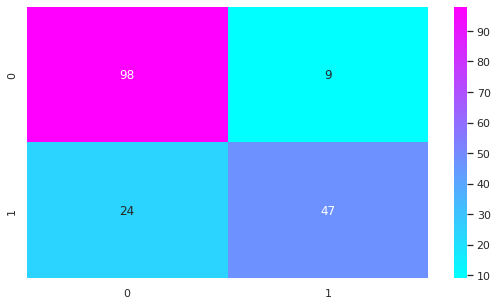

In [105]:
plt.figure(figsize=(9, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='cool')
plt.show()


**10.2 Accuracy, Precision and Recall**

> Accuracy: The accuracy of a model is the **proportion of correctly predicted outcomes to the total number of outcomes**. It is calculated by dividing the sum of true positives and true negatives by the total number of outcomes.

            Accuracy = (True Positives + True Negatives) / (Total Outcomes)
         
          
> Precision: Precision measures the **proportion of true positive predictions among all positive predictions made by the model**. It indicates how confident we can be in the accuracy of a positive prediction.

            Precision = True Positives / (True Positives + False Positives)
         
         
> Recall: Recall, also known as the true positive rate, measures the **proportion of actual positive outcomes that were correctly identified by the model**. It indicates how well the model is able to identify all positive outcomes.  
            
            Recall = True Positives / (True Positives + False Negatives)

In [106]:
print('Accuracy of Logistic Regression model  : ', (metrics.accuracy_score(y_test, y_pred)))
print('Recall of Logistic Regression model    : ', (metrics.recall_score(y_test, y_pred)))
print('Precision of Logistic Regression model : ', (metrics.precision_score(y_test, y_pred)))

Accuracy of Logistic Regression model  :  0.8146067415730337
Recall of Logistic Regression model    :  0.6619718309859155
Precision of Logistic Regression model :  0.8392857142857143


Although the model's accuracy and precision are impressive, it is notable that it only correctly identified 66.19 % of all positive cases, indicating that there are still some positive instances that were misclassified.

**10.3 Classification Report**



In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.84      0.66      0.74        71

    accuracy                           0.81       178
   macro avg       0.82      0.79      0.80       178
weighted avg       0.82      0.81      0.81       178



The model's precision in identifying both survivors (1) and non-survivors (0) is commendable. However, its recall and F1 score are particularly strong in detecting non-survivors, indicating a high degree of accuracy in this regard. In contrast, its performance in identifying survivors is somewhat average, suggesting that it may not be as effective in detecting those who survived.

The F1 score is a measure of the performance of a classification model, particularly in cases where both precision and recall are important. It is calculated as the harmonic mean of precision and recall, which provides a balanced view of both metrics. The F1 score is used to evaluate the model's ability to correctly identify both true positives and true negatives, and it is particularly useful in cases where there is a class imbalance in the data, where one class has significantly more instances than the other. The F1 score is calculated as follows:

    F1 = 2 * (precision * recall) / (precision + recall)

The F1 score is used to compare the performance of different models and to evaluate the effectiveness of a model in a specific task. It is a widely used metric in machine learning and is often used in conjunction with other metrics such as accuracy, precision, and recall to provide a more comprehensive view of a model's performance.

# 11. Setting New Threshold  

The sigmoid function, which is commonly used to predict probabilities, typically employs a default threshold of 0.5 to determine whether an event occurs. However, we can explore the possibility of modifying this threshold to a different value and evaluate whether this adjustment enhances the performance of our model.

Here, we attempt to adjust the threshold to 0.6 by implementing the following modifications:

In [108]:
prediction_prob = LogisticRegression_model.predict_proba(X_test)[:,1]

prediction_prob[prediction_prob > 0.6] = 1
prediction_prob[prediction_prob <= 0.6] = 0


**11.1 Checking Confusion Matrix for The Updated Threshold**

In [109]:
confusion_matrix_prob =pd.crosstab(y_test,prediction_prob)
confusion_matrix_prob

col_0,0.0,1.0
Survived,,
0,102,5
1,29,42


<a id="14.2"></a> <br>
**11.2 Accuracy, Precision and Recall**

In [ ]:
print('Accuracy of Logistic Regression model : ', (metrics.accuracy_score(y_test, prediction_prob)))
print('Recall of Logistic Regression model   : ', (metrics.recall_score(y_test, prediction_prob)))
print('Precision of Logistic Regression model: ', (metrics.precision_score(y_test, prediction_prob)))

<a id="14.3"></a> <br>
**11.3 Classification Report for Updated Threshold**

In [110]:
print(classification_report(y_test,prediction_prob))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86       107
           1       0.89      0.59      0.71        71

    accuracy                           0.81       178
   macro avg       0.84      0.77      0.78       178
weighted avg       0.82      0.81      0.80       178



After adjusting the threshold, a thorough examination of the evaluation metrics reveals that the changes did not significantly improve the model's performance. Therefore, it is advisable to stick with the default threshold of 0.5, as it appears to be a suitable choice for the model's current configuration. After changing threshold, considering all evaluation details, there is not much positive impact. Moreover, the Recall and F1 Score for detecting survivors are decreasing. So **it is good to go with threshold = 0.5.**

<a id="15"></a> <br>
# 12. Testing Dataset (Test.csv) Analysis

**12.1 Missing Value Analysis of Test.csv**

In [111]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

**12.2 Heat Map for missing value of Test.csv**

<AxesSubplot:>

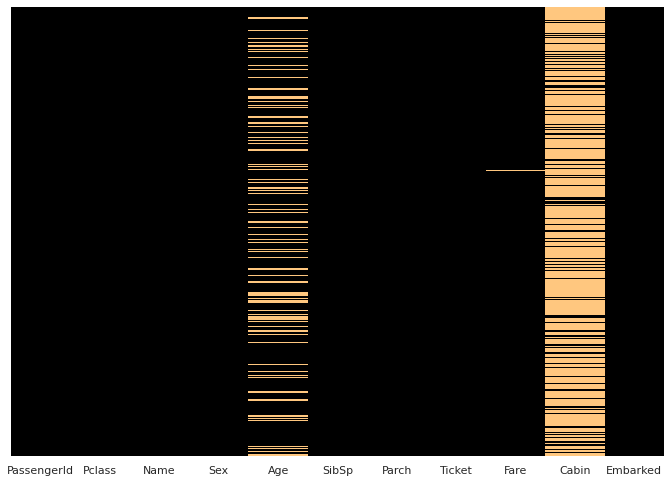

In [114]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap="copper")

From Test data out of 418 rows, we have 86 values missing for 'Age', 327 for 'Cabin' and 1 for 'Fare'.

1. **'Age'** will have to fill the null values using **median**. This can be done in the similar way that is done to training dataset.
2. **'Cabin'** is having majority of data missing as well as we dropped it in train_data, so we can **drop 'Cabin' column for test data** also. 
3. As **there is only 1 value missing for 'Fare'**, we can provide **mean** of fare value to it.

<a id="16"></a> <br>
# 13. Data Preprocessing for Test.csv 

**13.1 Handling Missing Data of 'Age'**

Text(0.5, 1.0, 'Age over Pclass')

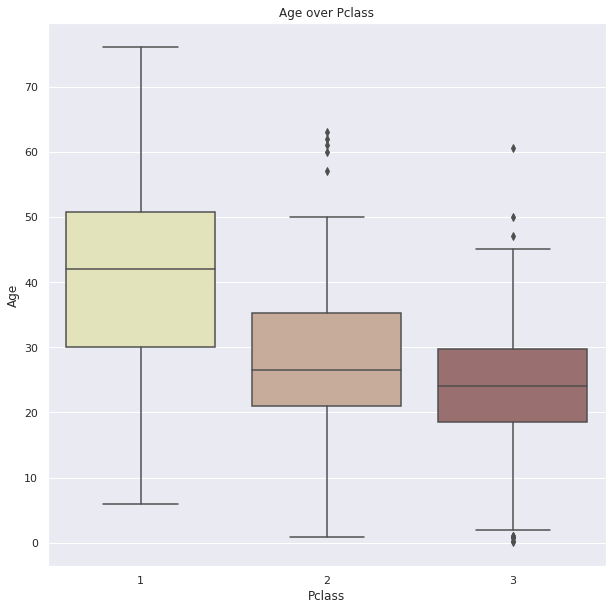

In [115]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='Pclass',y='Age',data=test_df,palette='pink_r')
plt.title('Age over Pclass')

As we have created impute_train_age() for handling missing data of test_data in `train_df`, we can define and call new function impute_test_age() to handle missing data of `test_df`.

In [116]:
def impute_test_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 42

        elif Pclass == 2:
            return 27

        else:
            return 25

    else:
        return Age

In [117]:
test_df['Age'] = test_df[['Age','Pclass']].apply(impute_test_age,axis=1)

In [118]:
test_df['Age'].isnull().sum()

0


**13.2 Handling Missing Data of 'Cabin'**

In [119]:
test_df.drop('Cabin',axis=1,inplace=True)

In [120]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

Now only the 'Fare' feature remains with missing values.

**13.3 Handling Missing Data of 'Fare'**

In [121]:
#checking the row that has null value
null_columns=test_df.columns[test_df.isnull().any()]
row_num = (test_df[test_df["Fare"].isnull()][null_columns])
row_num

,Fare
152,NaN


In [122]:
test_df.iloc[152, :]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Embarked                        S
Name: 152, dtype: object

Missing value of 'Fare' belong to a male passenger whose PassengerId is 1044 from Pclass 3 and his age is 60.5

<AxesSubplot:xlabel='Fare', ylabel='Count'>

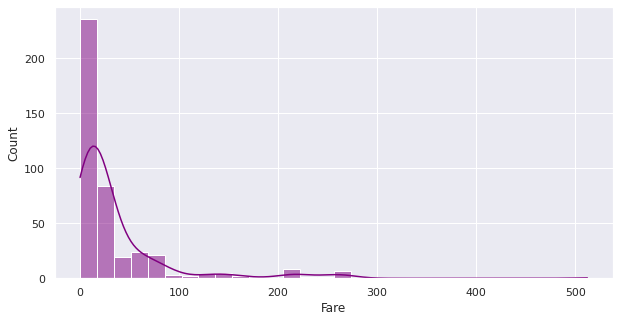

In [123]:
plt.figure(figsize=(10, 5))
sns.histplot(test_df['Fare'].dropna(),kde=True,color='purple',bins=30)

From the plot, it is clear that 'Fare' is skewed towards lower values. Therefore, we can use the **median** to handle the missing data for 'Fare'.

In [124]:
Fare_median = test_df["Fare"].median()
Fare_median

14.4542

In [125]:
test_df = test_df.replace(np.NaN,14.4542)

In [126]:
test_df.iloc[152, :]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                      14.4542
Embarked                        S
Name: 152, dtype: object

Fare Value for PassengerId 1044 is replaced by 14.4542

In [127]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<a id="17"></a> <br>
# 14. Dropping Insignificant Features

As we know Ticket and PassengerId features are not having any significance for target prediction. So we can drop those features.

In [128]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


As Ticket does have any significant impact on Target, we have dropped it from train_df, so we will drop same from test_data also.

In [129]:
#Saving PassengerID for submission
test_pass = test_df['PassengerId']
test_pass

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [130]:
test_df.drop(['Ticket','PassengerId'],axis=1,inplace=True)

In [131]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


# 15. Encoding Categorical Features of `test_df`

In [132]:
test_df = pd.get_dummies(test_df, columns = ['Sex', 'Embarked'], drop_first=True)

In [133]:
test_df.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",34.5,0,0,7.8292,1,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,0,0,1
2,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,1,1,0
3,3,"Wirz, Mr. Albert",27.0,0,0,8.6625,1,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,0,0,1


<a id="19"></a> <br>
# 16.  Feature Scaling for `test_df`

Here we are having different dataset for training and test. So there is no need to split the dataset. We can directly apply feature scaling.

In [134]:
X1_Train = train_df.drop(['Survived'],axis = 1)
y1_Train = train_df['Survived']

In [135]:
X1_Train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [136]:
test_df.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,"Kelly, Mr. James",34.5,0,0,7.8292,1,1,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,0,0,1
2,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,1,1,0
3,3,"Wirz, Mr. Albert",27.0,0,0,8.6625,1,0,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,0,0,1


In [137]:
# Dropping 'Name' Feature in test_df because this feature is an object
test_df = test_df.drop('Name', axis=1)

In [139]:
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [140]:
y1_Train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [141]:
y1_Train.shape

(889,)

In [142]:
test_df.shape

(418, 8)

In [143]:
X1_Train.shape

(889, 8)

In [144]:
cols = test_df.columns

scal = RobustScaler()

X1_Train = scal.fit_transform(X1_Train)
test_df = scal.transform(test_df)

In [145]:
X1_Train = pd.DataFrame(X1_Train,columns=cols)
test_df = pd.DataFrame(test_df,columns=cols)

<a id="20"></a> <br>
# 17.  Building Logistic Regression 

In [146]:
LogisticRegression_model.fit(X1_Train,y1_Train)

LogisticRegression(max_iter=4000)

In [147]:
y_pred_2 = LogisticRegression_model.predict(test_df)

In [148]:
y_pred_2

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

<a id="21"></a> <br>
# 18. Conclusion

1. The 'train_df' dataset contains missing values in 'Age' (177), 'Cabin' (687), and 'Embarked' (2). To handle these missing values:

- For 'Age', we can use the median age corresponding to each 'Pclass' since there is a strong correlation between 'Age' and 'Pclass'.

- For 'Cabin', given the high proportion of missing values and its categorical nature, it is reasonable to drop this column to simplify the analysis and reduce the impact of missing data.

- For 'Embarked', since there are only two missing values and they have a minimal impact on the overall dataset, it is reasonable to drop these two rows to ensure a complete and consistent dataset for analysis.

2. Survival is highly dependent on Pclass. This indicates the majority of people who could afford enough money to get in Pclass 1, were most likely to survive.

- 62.96% of PClass 1 could survive
- 47.28% of Pclass2 could survive
- 24.23% of PClass3 could survive

3. Majority of the passenger who could survive are females.
Out of total females traveled 74.2% of them could survive.

4. Majority of the male passengers could not survive.
18.9% of total male traveled could only survive

5. Harbour from which the passengers have boarded also has a significant impact on the survival rate.
- 55.36% of Embarked C could survive
- 38.96% of Embarked Q could survive
- 33.7% of Embarked S could survive

6. The majority of passengers traveled alone, not with their siblings, spouse, parent, or children.

In [149]:
submission = pd.DataFrame({'PassengerId': test_pass, 'Survived': y_pred_2})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [150]:
submission.to_csv('submission.csv',index=False)